<a href="https://colab.research.google.com/github/dipsikhamudoi/Case-Study--Lead-Scoring/blob/main/Final_Surface_waterbody_detection_using_U_net_Dipsikha_Mudoi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'satellite-images-of-water-bodies:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F660021%2F1165040%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240314%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240314T030022Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Db533078a8c733ff788dfc3cb93edbdcebe332f3c99feac72917bf4c989fd4e83ef3b9fc13c478c8102ef6aaeb22d956582a126a849e8fe37dda593c5a199d91d2381d3cee4bdb44361cc534bf166367fd8e5cc0b3c06cd95ce6af9c9a87caf61973b7decced8f1965a2772e2c0a85bd847930176bd17d322983db64048d794a34663aa1048e5bab56b85a7e4c77cad5e68097c4b6de2e7a212aeb1776e27515d992cc5e152c203000e4e50a76615df02cc2c47787d691cda5220a99fd384aed958e42d581702307060f1c65e54f6387fd70eec7aa024a8dc60cb901fc28cb4c5c6dd4c396517b2d420a9cee36065290b61492f21781a842aac8de0bf1163bce0'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 258708186 bytes downloaded
Downloaded and uncompressed: satellite-images-of-water-bodies
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/kaggle/input/satellite-images-of-water-bodies/Water Bodies Dataset/Images/water_body_2312.jpg
/kaggle/input/satellite-images-of-water-bodies/Water Bodies Dataset/Images/water_body_1524.jpg
/kaggle/input/satellite-images-of-water-bodies/Water Bodies Dataset/Images/water_body_8457.jpg
/kaggle/input/satellite-images-of-water-bodies/Water Bodies Dataset/Images/water_body_7297.jpg
/kaggle/input/satellite-images-of-water-bodies/Water Bodies Dataset/Images/water_body_1287.jpg
/kaggle/input/satellite-images-of-water-bodies/Water Bodies Dataset/Images/water_body_1263.jpg
/kaggle/input/satellite-images-of-water-bodies/Water Bodies Dataset/Images/water_body_2207.jpg
/kaggle/input/satellite-images-of-water-bodies/Water Bodies Dataset/Images/water_body_7732.jpg
/kaggle/input/satellite-images-of-water-bodies/Water Bodies Dataset/Images/water_body_7575.jpg
/kaggle/input/satellite-images-of-water-bodies/Water Bodies Dataset/Images/water_body_8662.jpg

# Adding required libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from pathlib import Path
import random
import glob

import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Preprocessing

In [ ]:
image_path = "/kaggle/input/satellite-images-of-water-bodies/Water Bodies Dataset/Images/*.jpg"
mask_path = "/kaggle/input/satellite-images-of-water-bodies/Water Bodies Dataset/Masks/*.jpg"



image_paths = sorted(glob.glob(image_path), key=lambda x: x.split('.')[0])
mask_paths = sorted(glob.glob(mask_path), key=lambda x: x.split('.')[0])

In [ ]:
len(image_paths)

2841

In [ ]:
len(mask_paths)

2841

Have to resize it to (128,128,3) so that it can better fit with the unet model



In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def resize_image(image, size):
    # Resize the image to the specified size
    resized_image = cv2.resize(image, size)
    return resized_image

def resize_mask(mask, size):
    # Convert the mask to grayscale
    mask_gray = cv2.cvtColor(mask, cv2.COLOR_RGB2GRAY)

    # Resize the mask to the specified size
    resized_mask = cv2.resize(mask_gray, size, interpolation=cv2.INTER_NEAREST)
    resized_mask = np.expand_dims(resized_mask, axis=2)
    return resized_mask



# Define the desired size
target_size = (128,128)

image_list = []
mask_list = []

for image_path, mask_path in zip(image_paths, mask_paths):
    # Load the image and mask
    image = plt.imread(image_path).astype(np.float32) / 255.
    mask = plt.imread(mask_path).astype(np.float32) / 255.

    # Resize the image and mask
    resized_image = resize_image(image, target_size)
    resized_mask = resize_mask(mask, target_size)

    image_list.append(resized_image)
    mask_list.append(resized_mask)

# Convert the image and mask lists to arrays
image_array = np.array(image_list)
mask_array = np.array(mask_list)

# Check the shapes of the resized image and mask arrays
print("Resized image array shape:", image_array.shape)
print("Resized mask array shape:", mask_array.shape)


Resized image array shape: (2841, 128, 128, 3)
Resized mask array shape: (2841, 128, 128, 1)


# plotting images and mask labels

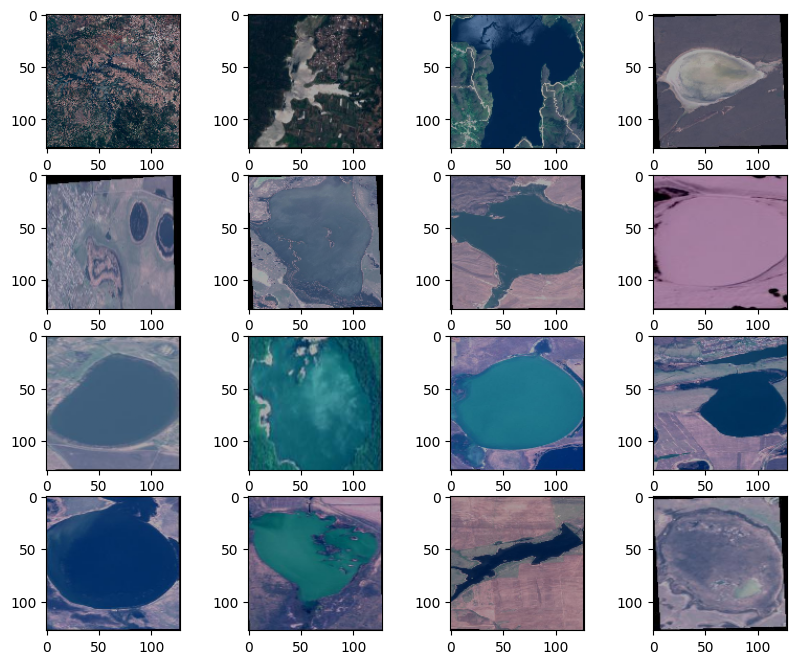

In [ ]:

def show_img(img, nrows=4, ncols=4, figsize=(10, 8)):
  fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
  id_img = 0
  for i in range(nrows):
    for j in range(ncols):
      ax[i][j].imshow(img[id_img])
      id_img += 1


show_img(image_array)

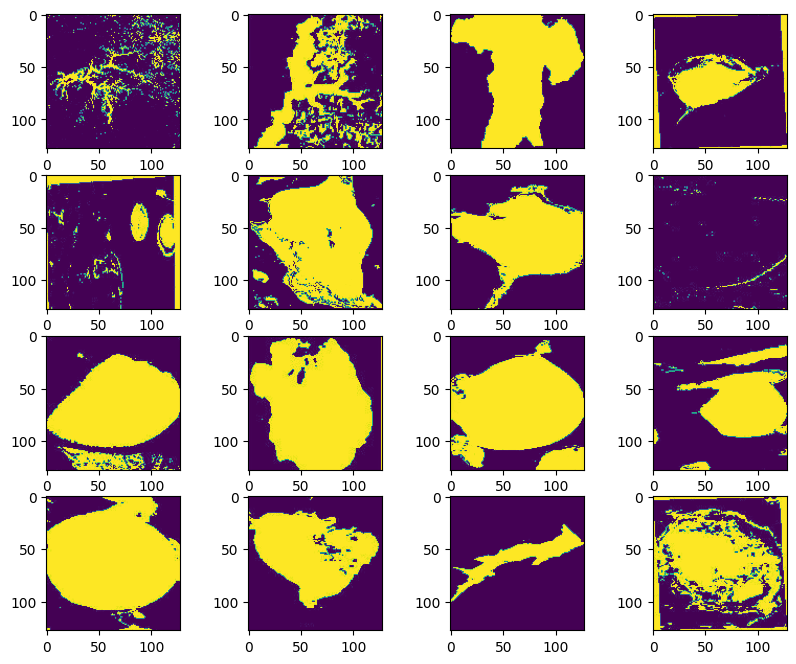

In [ ]:
show_img(mask_array)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(image_array,mask_array, test_size=0.2, random_state=23)

# Model Building



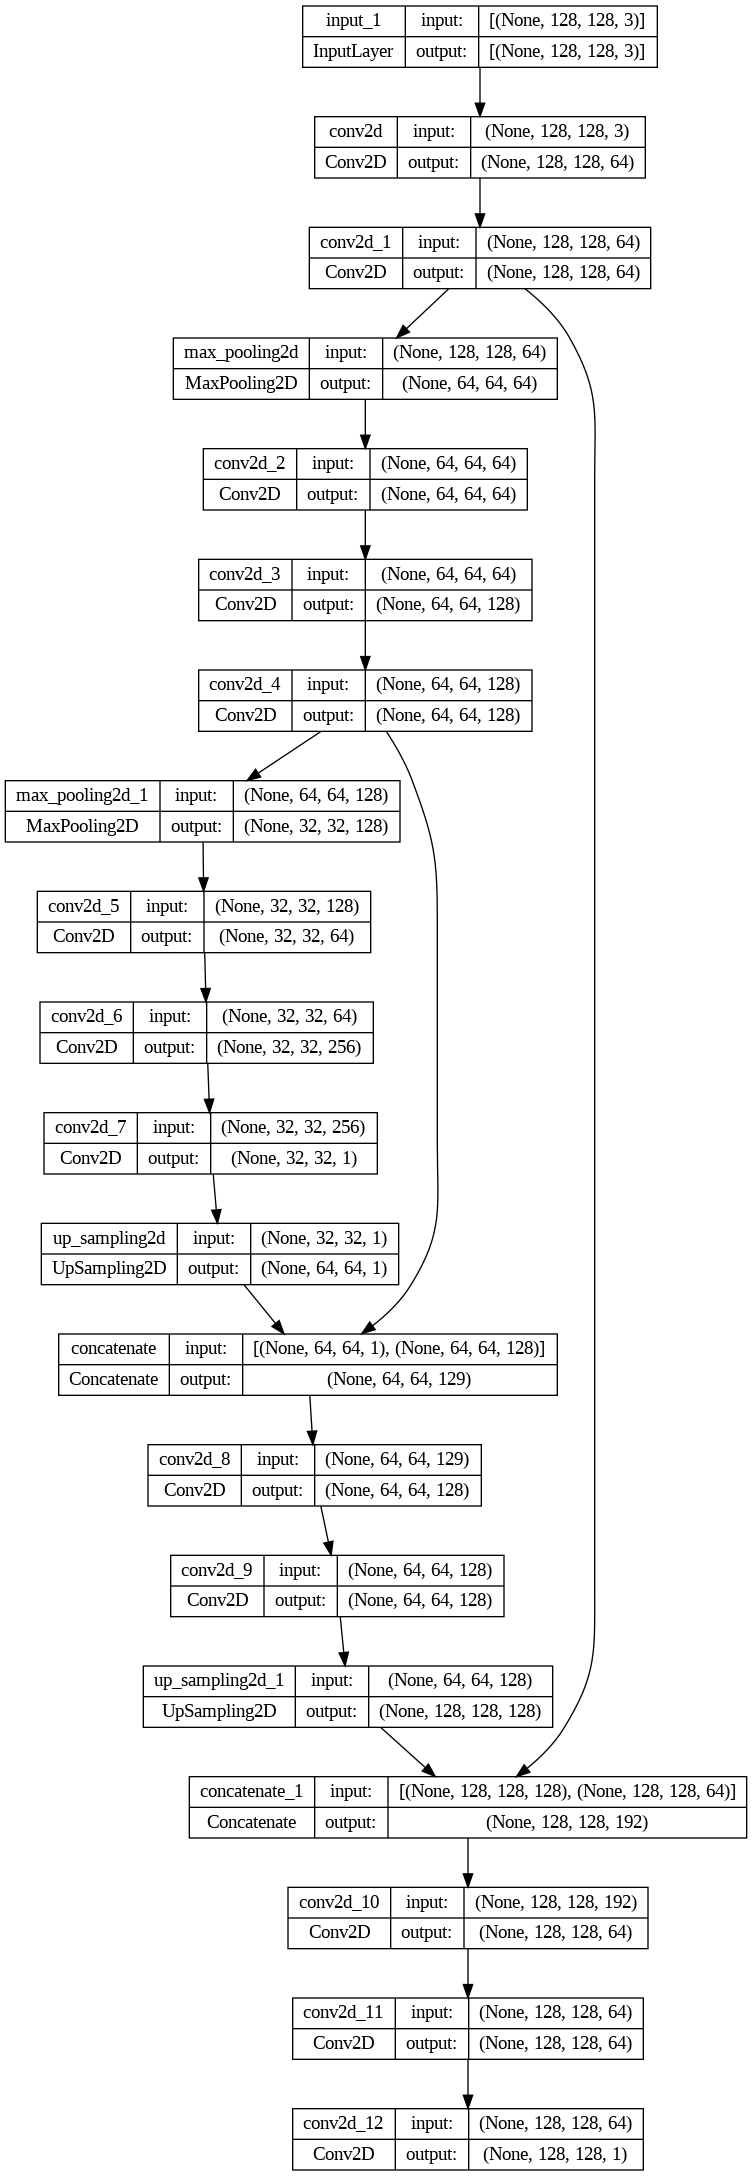

In [ ]:
import tensorflow as tf

x = tf.keras.layers.Input((128, 128, 3))

# Encoder
enc1 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
enc2 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(enc1)
enc3 = tf.keras.layers.MaxPooling2D((2, 2))(enc2)
enc3 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(enc3)
enc4 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(enc3)
enc5 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(enc4)
enc6 = tf.keras.layers.MaxPooling2D((2, 2))(enc5)
enc6 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(enc6)
enc7 = tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')(enc6)
enc8 = tf.keras.layers.Conv2D(1, (3, 3), padding='same', activation='relu')(enc7)

# Skip connections
skip1 = enc2
skip2 = enc5

# Decoder
dec1 = tf.keras.layers.UpSampling2D((2, 2))(enc8)
dec1 = tf.keras.layers.Concatenate()([dec1, skip2])
dec1 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(dec1)
dec1 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(dec1)

dec2 = tf.keras.layers.UpSampling2D((2, 2))(dec1)
dec2 = tf.keras.layers.Concatenate()([dec2, skip1])
dec2 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(dec2)
dec2 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(dec2)

# dec3 = tf.keras.layers.UpSampling2D((2, 2))(dec2)
dec3 = tf.keras.layers.Conv2D(1, (3, 3), padding='same', activation='sigmoid')(dec2)

model = tf.keras.Model(inputs=x, outputs=dec3)

tf.keras.utils.plot_model(model, show_shapes=True)


# Model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy, MeanIoU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

# Define the callbacks
early_stopping_cb = EarlyStopping(patience=5, restore_best_weights=True)
model_checkpoint_cb = ModelCheckpoint("/kaggle/working/watermodel.h5", save_best_only=True)

# Define the loss function
loss = tf.keras.losses.BinaryCrossentropy()

# Define the evaluation metrics
metrics = [
    BinaryAccuracy(name='accuracy'),
    Precision(name='precision'),
    Recall(name='recall')

]

# Define the optimizer with a specified learning rate (lr) and decay
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.96,
    staircase=True)

optimizer = Adam(learning_rate=lr_schedule)





# Compile the model with the specified optimizer, loss function, and metrics
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Train the model with the specified batch size, number of epochs, and validation data
history = model.fit(X_train, y_train, batch_size=32, epochs=30, validation_data=(X_test, y_test))






Epoch 1/30
71/71 [==============================] - 41s 306ms/step - loss: 0.5504 - accuracy: 0.6589 - precision: 0.6899 - recall: 0.3138 - val_loss: 0.4872 - val_accuracy: 0.6995 - val_precision: 0.6854 - val_recall: 0.4652
Epoch 2/30
71/71 [==============================] - 18s 247ms/step - loss: 0.4864 - accuracy: 0.6988 - precision: 0.7169 - recall: 0.4916 - val_loss: 0.4523 - val_accuracy: 0.7172 - val_precision: 0.7126 - val_recall: 0.5106
Epoch 3/30
71/71 [==============================] - 19s 273ms/step - loss: 0.4664 - accuracy: 0.7127 - precision: 0.7411 - recall: 0.5153 - val_loss: 0.4619 - val_accuracy: 0.7171 - val_precision: 0.6692 - val_recall: 0.6685
Epoch 4/30
71/71 [==============================] - 18s 253ms/step - loss: 0.4353 - accuracy: 0.7370 - precision: 0.7913 - recall: 0.5414 - val_loss: 0.4122 - val_accuracy: 0.7572 - val_precision: 0.7951 - val_recall: 0.5662
Epoch 5/30
71/71 [==============================] - 18s 250ms/step - loss: 0.4305 - accuracy: 0.7419

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 64)         1792      ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 128, 128, 64)         36928     ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 64, 64, 64)           0         ['conv2d_1[0][0]']            
 D)                                                                                           

Model2

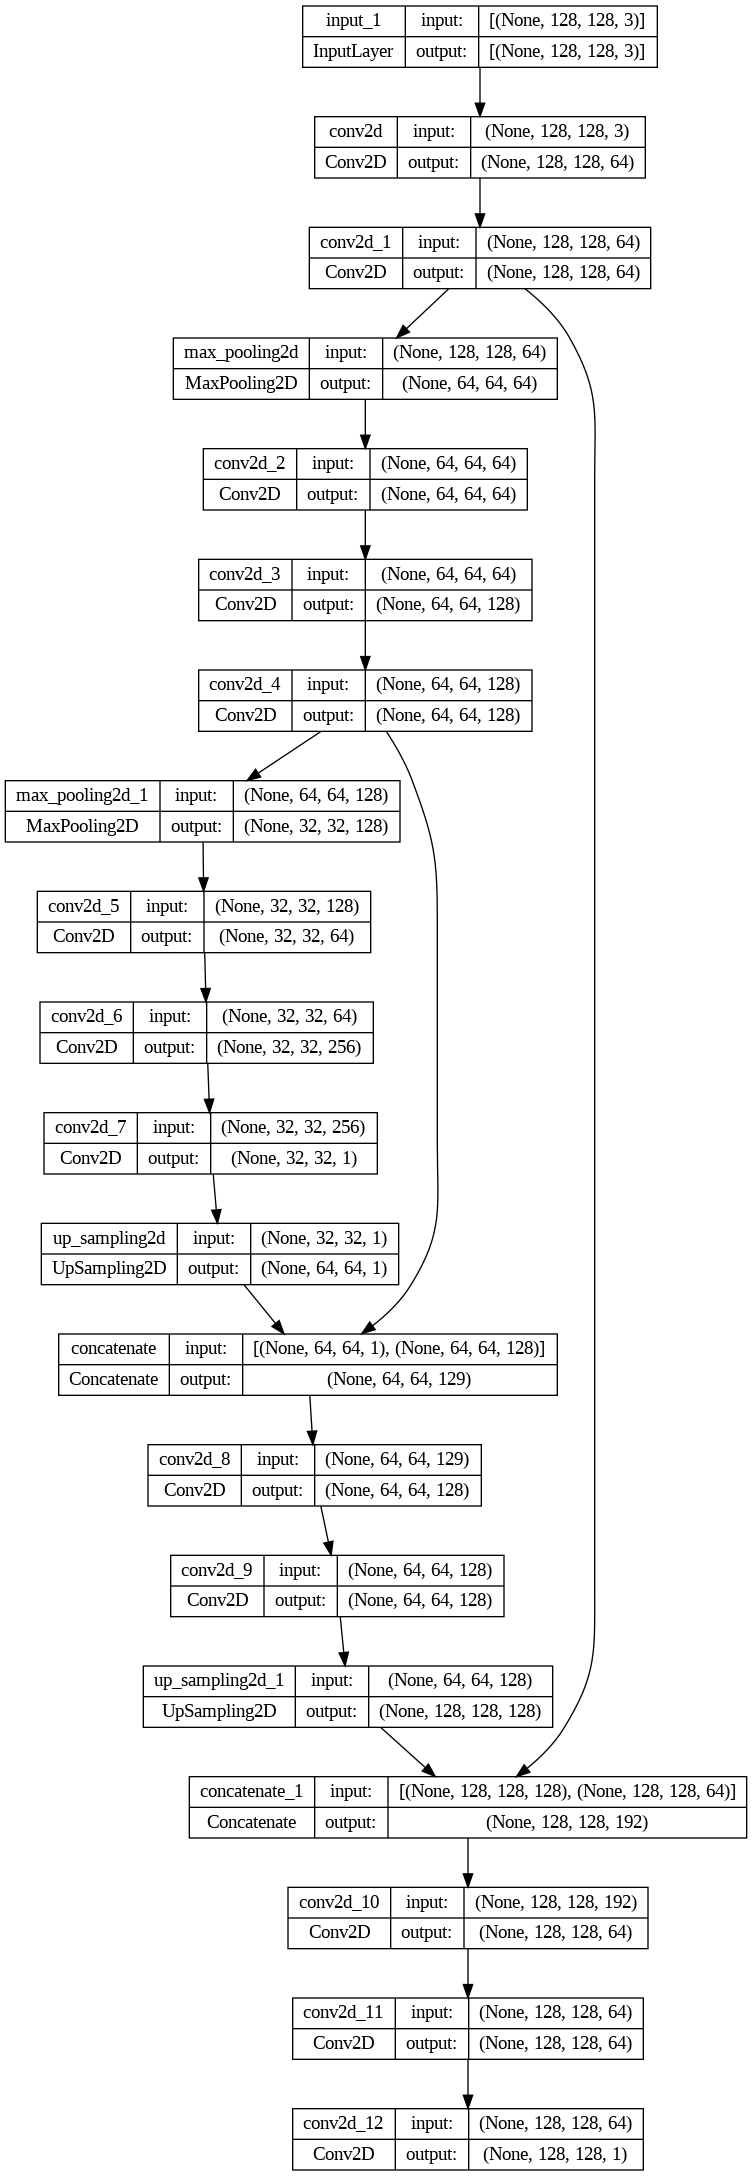

In [ ]:
model1 = tf.keras.Model(inputs=x, outputs=dec3)

tf.keras.utils.plot_model(model1, show_shapes=True)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy, MeanIoU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

# Define the callbacks
early_stopping_cb = EarlyStopping(patience=5, restore_best_weights=True)
model_checkpoint_cb = ModelCheckpoint("/kaggle/working/watermodel.h5", save_best_only=True)

# Define the loss function
loss = tf.keras.losses.BinaryCrossentropy()

# Define the evaluation metrics
metrics = [
    BinaryAccuracy(name='accuracy'),
    Precision(name='precision'),
    Recall(name='recall')

]

# Define the optimizer with a specified learning rate (lr) and decay
initial_learning_rate = 0.0001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.96,
    staircase=True)

optimizer = Adam(learning_rate=lr_schedule)





# Compile the model with the specified optimizer, loss function, and metrics
model1.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Train the model with the specified batch size, number of epochs, and validation data
history = model1.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))





Epoch 1/50
71/71 [==============================] - 24s 293ms/step - loss: 0.2836 - accuracy: 0.8088 - precision: 0.8984 - recall: 0.6746 - val_loss: 0.2782 - val_accuracy: 0.8152 - val_precision: 0.8851 - val_recall: 0.6788
Epoch 2/50
71/71 [==============================] - 18s 256ms/step - loss: 0.2773 - accuracy: 0.8121 - precision: 0.9062 - recall: 0.6769 - val_loss: 0.2763 - val_accuracy: 0.8160 - val_precision: 0.8945 - val_recall: 0.6669
Epoch 3/50
71/71 [==============================] - 18s 249ms/step - loss: 0.2750 - accuracy: 0.8133 - precision: 0.9096 - recall: 0.6772 - val_loss: 0.2733 - val_accuracy: 0.8169 - val_precision: 0.8962 - val_recall: 0.6690
Epoch 4/50
71/71 [==============================] - 18s 248ms/step - loss: 0.2733 - accuracy: 0.8141 - precision: 0.9105 - recall: 0.6781 - val_loss: 0.2743 - val_accuracy: 0.8174 - val_precision: 0.8910 - val_recall: 0.6791
Epoch 5/50
71/71 [==============================] - 18s 253ms/step - loss: 0.2721 - accuracy: 0.8145

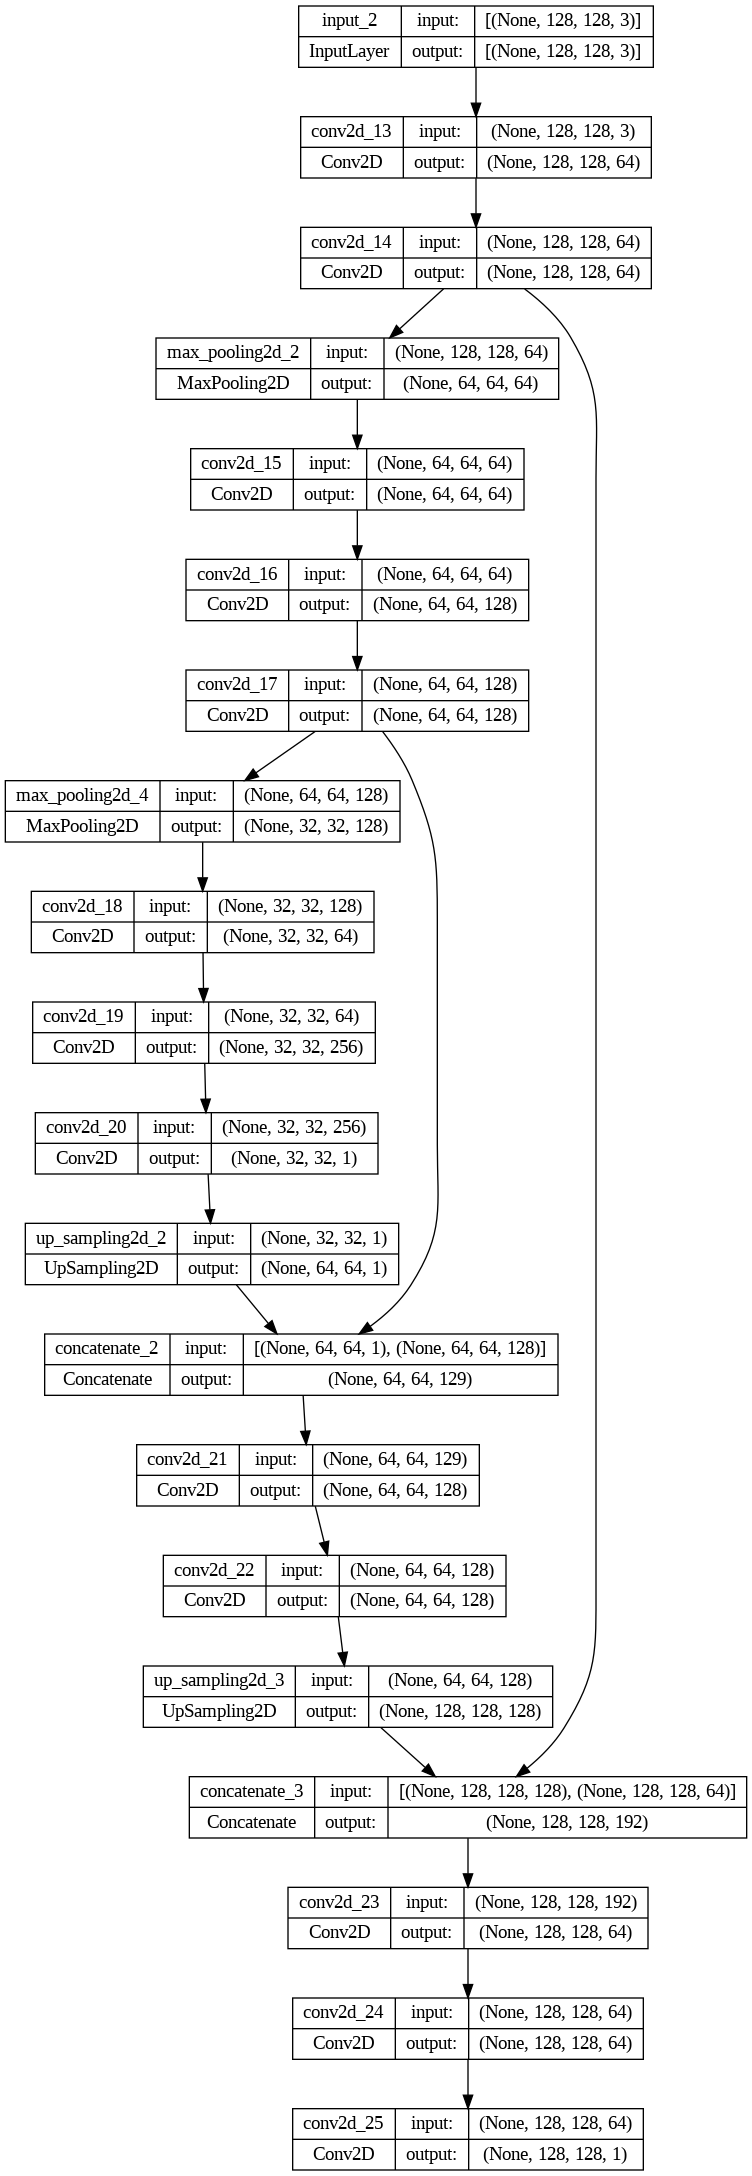

In [ ]:
import tensorflow as tf

x = tf.keras.layers.Input((128, 128, 3))

# Encoder
enc1 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
enc2 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(enc1)
enc3 = tf.keras.layers.MaxPooling2D((2, 2))(enc2)
enc3 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(enc3)
enc4 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(enc3)
enc5 = tf.keras.layers.MaxPooling2D((2, 2))(enc4)
enc5 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(enc4)
enc6 = tf.keras.layers.MaxPooling2D((2, 2))(enc5)
enc6 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(enc6)
enc7 = tf.keras.layers.MaxPooling2D((2, 2))(enc6)
enc7 = tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')(enc6)
enc8 = tf.keras.layers.Conv2D(1, (3, 3), padding='same', activation='relu')(enc7)

# Skip connections
skip1 = enc2
skip2 = enc5

# Decoder
dec1 = tf.keras.layers.UpSampling2D((2, 2))(enc8)
dec1 = tf.keras.layers.Concatenate()([dec1, skip2])
dec1 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(dec1)
dec1 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(dec1)

dec2 = tf.keras.layers.UpSampling2D((2, 2))(dec1)
dec2 = tf.keras.layers.Concatenate()([dec2, skip1])
dec2 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(dec2)
dec2 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(dec2)

# dec3 = tf.keras.layers.UpSampling2D((2, 2))(dec2)
dec3 = tf.keras.layers.Conv2D(1, (3, 3), padding='same', activation='sigmoid')(dec2)

model2 = tf.keras.Model(inputs=x, outputs=dec3)

tf.keras.utils.plot_model(model2, show_shapes=True)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy, MeanIoU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

# Define the callbacks
early_stopping_cb = EarlyStopping(patience=5, restore_best_weights=True)
model_checkpoint_cb = ModelCheckpoint("/kaggle/working/watermodel.h5", save_best_only=True)

# Define the loss function
loss = tf.keras.losses.BinaryCrossentropy()

# Define the evaluation metrics
metrics = [
    BinaryAccuracy(name='accuracy'),
    Precision(name='precision'),
    Recall(name='recall')

]

# Define the optimizer with a specified learning rate (lr) and decay
initial_learning_rate = 0.0001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.96,
    staircase=True)

optimizer = Adam(learning_rate=lr_schedule)





# Compile the model with the specified optimizer, loss function, and metrics
model2.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Train the model with the specified batch size, number of epochs, and validation data
history = model2.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))





Epoch 1/50
71/71 [==============================] - 25s 298ms/step - loss: 0.5870 - accuracy: 0.6343 - precision: 0.7800 - recall: 0.1099 - val_loss: 0.5118 - val_accuracy: 0.7070 - val_precision: 0.7443 - val_recall: 0.3838
Epoch 2/50
71/71 [==============================] - 19s 266ms/step - loss: 0.4807 - accuracy: 0.7250 - precision: 0.7779 - recall: 0.5050 - val_loss: 0.4599 - val_accuracy: 0.7345 - val_precision: 0.8668 - val_recall: 0.3771
Epoch 3/50
71/71 [==============================] - 20s 277ms/step - loss: 0.4437 - accuracy: 0.7384 - precision: 0.8051 - recall: 0.5242 - val_loss: 0.4675 - val_accuracy: 0.6972 - val_precision: 0.8616 - val_recall: 0.2505
Epoch 4/50
71/71 [==============================] - 20s 275ms/step - loss: 0.4397 - accuracy: 0.7372 - precision: 0.8093 - recall: 0.5152 - val_loss: 0.4546 - val_accuracy: 0.7303 - val_precision: 0.6920 - val_recall: 0.6893
Epoch 5/50
71/71 [==============================] - 19s 264ms/step - loss: 0.4267 - accuracy: 0.7449

Model 4

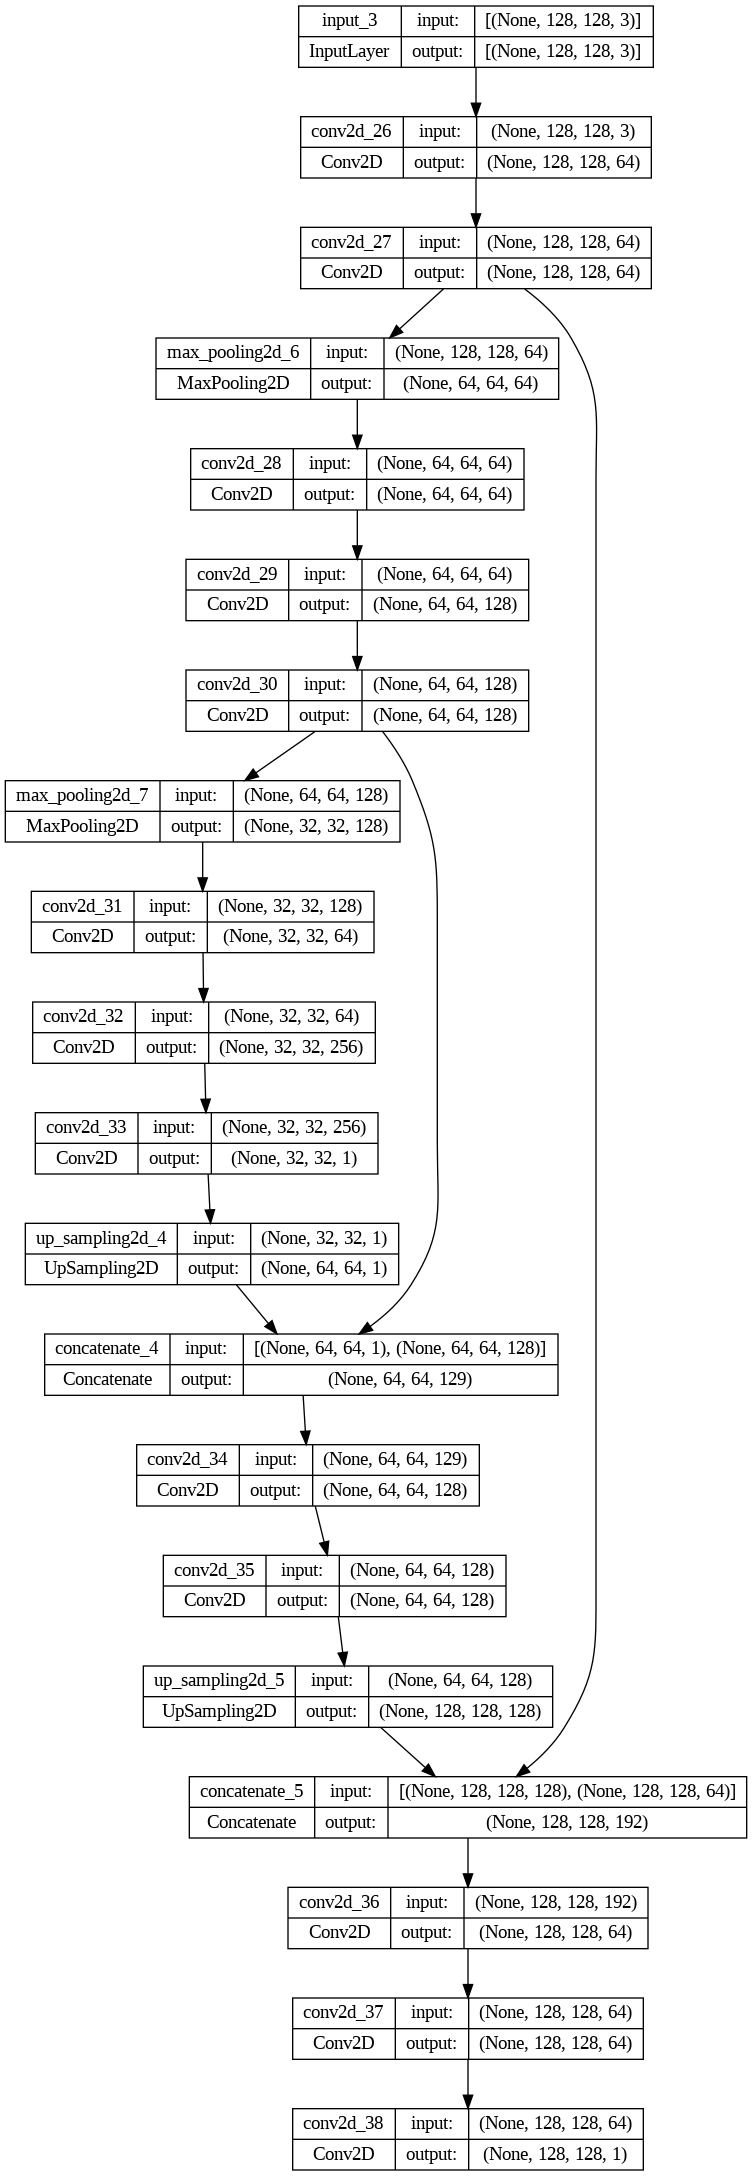

In [ ]:
import tensorflow as tf

x = tf.keras.layers.Input((128, 128, 3))

# Encoder
enc1 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
enc2 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(enc1)
enc3 = tf.keras.layers.MaxPooling2D((2, 2))(enc2)
enc3 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(enc3)
enc4 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(enc3)
enc5 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(enc4)
enc6 = tf.keras.layers.MaxPooling2D((2, 2))(enc5)
enc6 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(enc6)
enc7 = tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')(enc6)
enc8 = tf.keras.layers.Conv2D(1, (3, 3), padding='same', activation='relu')(enc7)

# Skip connections
skip1 = enc2
skip2 = enc5

# Decoder
dec1 = tf.keras.layers.UpSampling2D((2, 2))(enc8)
dec1 = tf.keras.layers.Concatenate()([dec1, skip2])
dec1 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(dec1)
dec1 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(dec1)

dec2 = tf.keras.layers.UpSampling2D((2, 2))(dec1)
dec2 = tf.keras.layers.Concatenate()([dec2, skip1])
dec2 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(dec2)
dec2 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(dec2)

# dec3 = tf.keras.layers.UpSampling2D((2, 2))(dec2)
dec3 = tf.keras.layers.Conv2D(1, (3, 3), padding='same', activation='sigmoid')(dec2)

model3 = tf.keras.Model(inputs=x, outputs=dec3)

tf.keras.utils.plot_model(model3, show_shapes=True)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy, MeanIoU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

# Define the callbacks
model_checkpoint_cb = ModelCheckpoint("/kaggle/working/watermodel.h5", save_best_only=True)
early_stopping_cb = EarlyStopping(patience=5, restore_best_weights=True)

# Define the loss function
loss = tf.keras.losses.BinaryCrossentropy()

# Define the evaluation metrics
metrics = [
    BinaryAccuracy(name='accuracy'),
    Precision(name='precision'),
    Recall(name='recall')
]

# Define the optimizer with a specified learning rate
optimizer = Adam(learning_rate=0.0001)

# Compile the model with the specified optimizer, loss function, and metrics
model3.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Train the model with the specified batch size, number of epochs, and validation data
history = model3.fit(X_train, y_train, batch_size=32, epochs=30, validation_data=(X_test, y_test),
                    callbacks=[model_checkpoint_cb, early_stopping_cb])

Epoch 1/30
71/71 [==============================] - 24s 285ms/step - loss: 0.5934 - accuracy: 0.6229 - precision: 0.7525 - recall: 0.0655 - val_loss: 0.5114 - val_accuracy: 0.6945 - val_precision: 0.7855 - val_recall: 0.2603
Epoch 2/30


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


71/71 [==============================] - 19s 273ms/step - loss: 0.4901 - accuracy: 0.7150 - precision: 0.7630 - recall: 0.4731 - val_loss: 0.4201 - val_accuracy: 0.7534 - val_precision: 0.8204 - val_recall: 0.4983
Epoch 3/30
71/71 [==============================] - 19s 263ms/step - loss: 0.4222 - accuracy: 0.7508 - precision: 0.8291 - recall: 0.5399 - val_loss: 0.4009 - val_accuracy: 0.7710 - val_precision: 0.8145 - val_recall: 0.5929
Epoch 4/30
71/71 [==============================] - 18s 261ms/step - loss: 0.4186 - accuracy: 0.7512 - precision: 0.8364 - recall: 0.5345 - val_loss: 0.4184 - val_accuracy: 0.7447 - val_precision: 0.7513 - val_recall: 0.5953
Epoch 5/30
71/71 [==============================] - 20s 282ms/step - loss: 0.3900 - accuracy: 0.7661 - precision: 0.8516 - recall: 0.5721 - val_loss: 0.4354 - val_accuracy: 0.7256 - val_precision: 0.9100 - val_recall: 0.3227
Epoch 6/30
71/71 [==============================] - 19s 270ms/step - loss: 0.3787 - accuracy: 0.7709 - precisio

Model-4

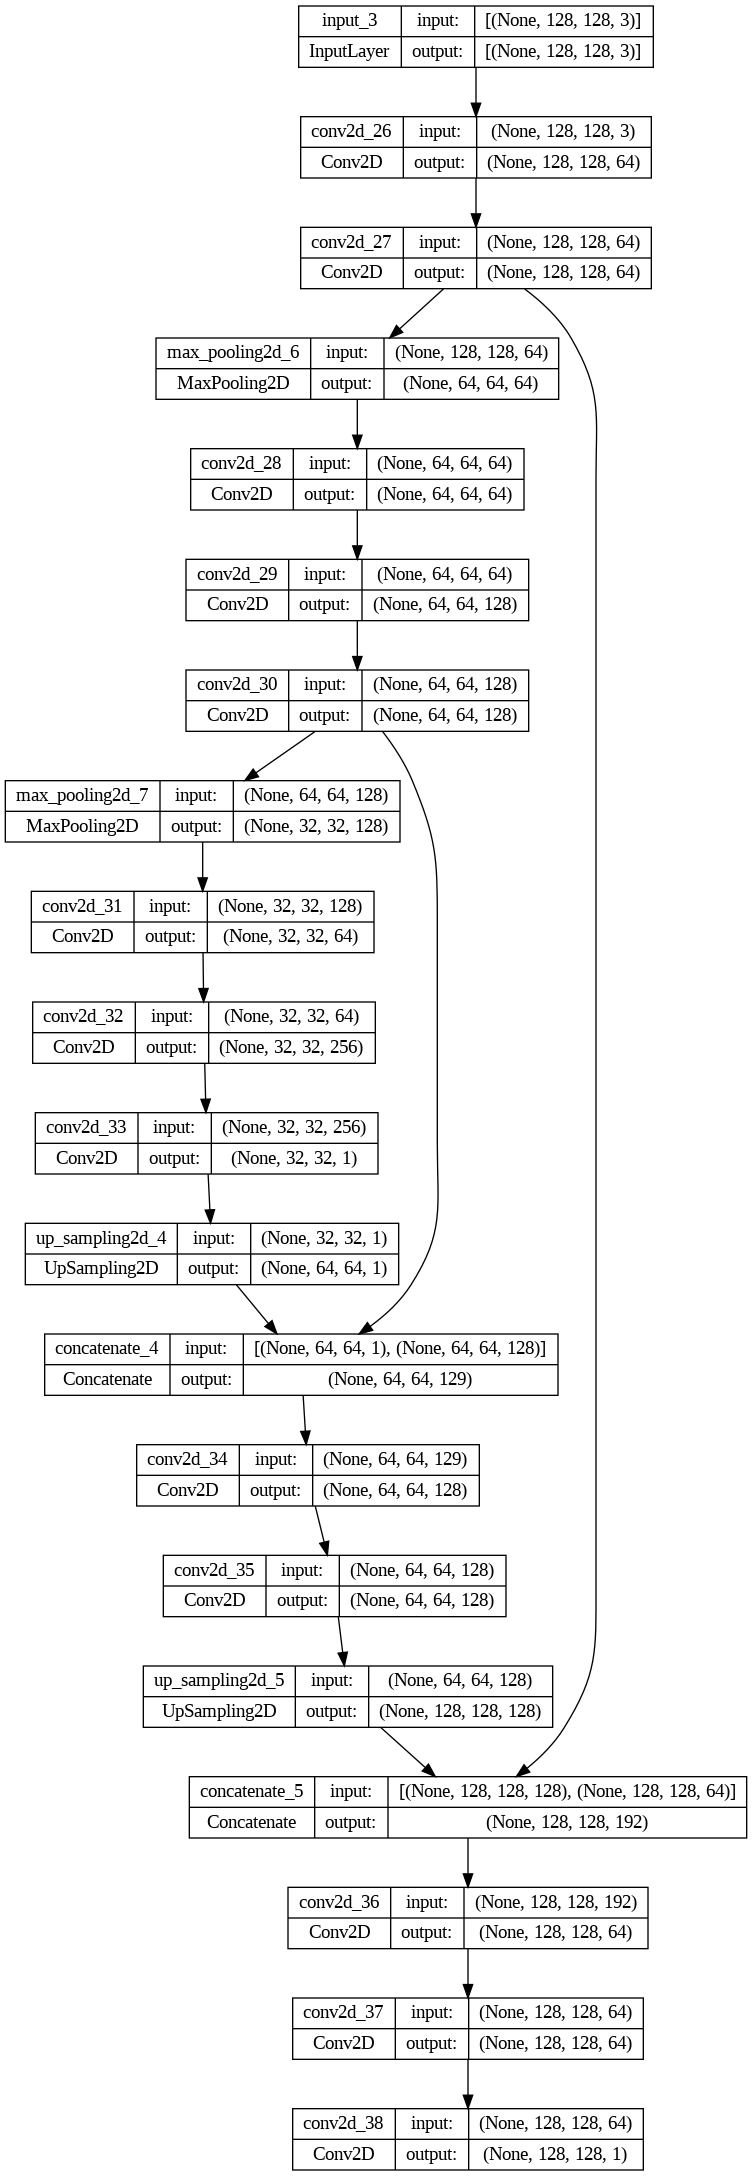

In [ ]:
model4 = tf.keras.Model(inputs=x, outputs=dec3)

tf.keras.utils.plot_model(model4, show_shapes=True)


In [ ]:

# Compile the model with the specified optimizer, loss function, and metrics
model4.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Train the model with the specified batch size, number of epochs, and validation data
history = model4.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test),
                    callbacks=[model_checkpoint_cb, early_stopping_cb])

Epoch 1/50
71/71 [==============================] - 21s 280ms/step - loss: 0.2678 - accuracy: 0.8141 - precision: 0.9051 - recall: 0.6837 - val_loss: 0.2721 - val_accuracy: 0.8187 - val_precision: 0.8895 - val_recall: 0.6855
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


71/71 [==============================] - 20s 284ms/step - loss: 0.2740 - accuracy: 0.8149 - precision: 0.9072 - recall: 0.6828 - val_loss: 0.2692 - val_accuracy: 0.8191 - val_precision: 0.8944 - val_recall: 0.6797
Epoch 3/50
71/71 [==============================] - 19s 269ms/step - loss: 0.2737 - accuracy: 0.8146 - precision: 0.9064 - recall: 0.6831 - val_loss: 0.2687 - val_accuracy: 0.8202 - val_precision: 0.9113 - val_recall: 0.6569
Epoch 4/50
71/71 [==============================] - 19s 263ms/step - loss: 0.2725 - accuracy: 0.8148 - precision: 0.9059 - recall: 0.6850 - val_loss: 0.2677 - val_accuracy: 0.8211 - val_precision: 0.8986 - val_recall: 0.6796
Epoch 5/50
71/71 [==============================] - 20s 280ms/step - loss: 0.2688 - accuracy: 0.8166 - precision: 0.9099 - recall: 0.6858 - val_loss: 0.2704 - val_accuracy: 0.8177 - val_precision: 0.9101 - val_recall: 0.6520
Epoch 6/50
71/71 [==============================] - 20s 288ms/step - loss: 0.2670 - accuracy: 0.8173 - precisio

Model-5

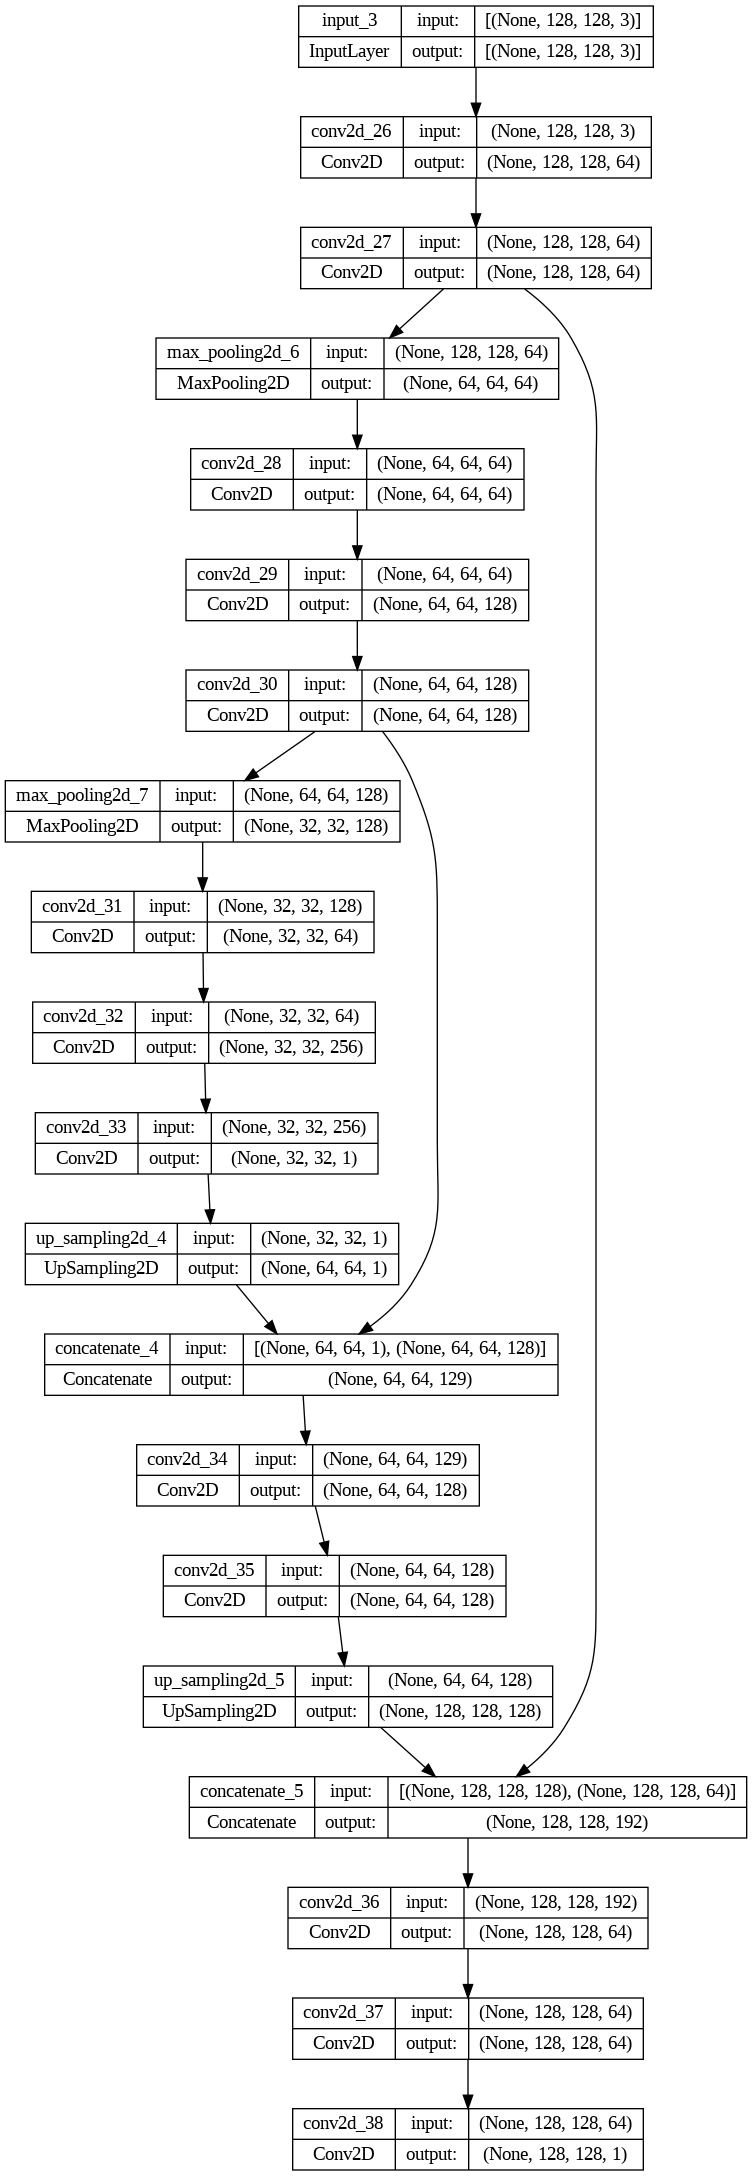

In [ ]:
model5 = tf.keras.Model(inputs=x, outputs=dec3)

tf.keras.utils.plot_model(model5, show_shapes=True)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy, MeanIoU
from tensorflow.keras.optimizers import Nadam,Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

# Define the callbacks
early_stopping_cb = EarlyStopping(patience=5, restore_best_weights=True)
model_checkpoint_cb = ModelCheckpoint("/kaggle/working/watermodel.h5", save_best_only=True)

# Define the loss function
loss = tf.keras.losses.BinaryCrossentropy()



# Define the evaluation metrics
metrics = [
    BinaryAccuracy(name='accuracy'),
    Precision(name='precision'),
    Recall(name='recall')
]

# Define the optimizer with a specified learning rate
optimizer = Nadam(learning_rate=0.0001)




# Compile the model with the specified optimizer, loss function, and metrics
model5.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Train the model with the specified batch size, number of epochs, and validation data
history = model5.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))





Epoch 1/50
71/71 [==============================] - 30s 319ms/step - loss: 0.2502 - accuracy: 0.8240 - precision: 0.9188 - recall: 0.7013 - val_loss: 0.2622 - val_accuracy: 0.8247 - val_precision: 0.8890 - val_recall: 0.7080
Epoch 2/50
71/71 [==============================] - 19s 269ms/step - loss: 0.2479 - accuracy: 0.8246 - precision: 0.9183 - recall: 0.7041 - val_loss: 0.2543 - val_accuracy: 0.8261 - val_precision: 0.9047 - val_recall: 0.6912
Epoch 3/50
71/71 [==============================] - 19s 264ms/step - loss: 0.2472 - accuracy: 0.8251 - precision: 0.9196 - recall: 0.7046 - val_loss: 0.2550 - val_accuracy: 0.8258 - val_precision: 0.9142 - val_recall: 0.6754
Epoch 4/50
71/71 [==============================] - 20s 283ms/step - loss: 0.2461 - accuracy: 0.8253 - precision: 0.9206 - recall: 0.7039 - val_loss: 0.2544 - val_accuracy: 0.8262 - val_precision: 0.9062 - val_recall: 0.6897
Epoch 5/50
71/71 [==============================] - 19s 269ms/step - loss: 0.2457 - accuracy: 0.8248

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import BinaryAccuracy, Precision, Recall
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.layers import Dropout
import tensorflow as tf

# Define callbacks
early_stopping_cb = EarlyStopping(patience=5, restore_best_weights=True)
model_checkpoint_cb = ModelCheckpoint("/kaggle/working/watermodel.h5", save_best_only=True)

# Define loss function
loss = BinaryCrossentropy()

# Define evaluation metrics
metrics = [
    BinaryAccuracy(name='accuracy'),
    Precision(name='precision'),
    Recall(name='recall')
]

# Define optimizer with a specified learning rate
optimizer = Nadam(learning_rate=0.0001)

# Define model architecture
model6 = tf.keras.Sequential([
    # Add convolutional layers with dropout regularization
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Flatten and add dense layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model with specified optimizer, loss function, and metrics
model6.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Train the model with specified batch size, number of epochs, and validation data
history = model5.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test),
                      callbacks=[early_stopping_cb, model_checkpoint_cb])

Epoch 1/50
71/71 [==============================] - 22s 306ms/step - loss: 0.2060 - accuracy: 0.8394 - precision: 0.9356 - recall: 0.7346 - val_loss: 0.2718 - val_accuracy: 0.8185 - val_precision: 0.8508 - val_recall: 0.7510
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


71/71 [==============================] - 19s 274ms/step - loss: 0.2076 - accuracy: 0.8391 - precision: 0.9346 - recall: 0.7338 - val_loss: 0.2557 - val_accuracy: 0.8258 - val_precision: 0.8861 - val_recall: 0.7233
Epoch 3/50
71/71 [==============================] - 20s 283ms/step - loss: 0.2071 - accuracy: 0.8390 - precision: 0.9346 - recall: 0.7337 - val_loss: 0.2528 - val_accuracy: 0.8295 - val_precision: 0.9114 - val_recall: 0.6963
Epoch 4/50
71/71 [==============================] - 20s 284ms/step - loss: 0.2096 - accuracy: 0.8380 - precision: 0.9341 - recall: 0.7314 - val_loss: 0.2519 - val_accuracy: 0.8295 - val_precision: 0.9160 - val_recall: 0.6908
Epoch 5/50
71/71 [==============================] - 19s 269ms/step - loss: 0.2054 - accuracy: 0.8397 - precision: 0.9357 - recall: 0.7349 - val_loss: 0.2557 - val_accuracy: 0.8289 - val_precision: 0.9014 - val_recall: 0.7101
Epoch 6/50
71/71 [==============================] - 19s 272ms/step - loss: 0.2034 - accuracy: 0.8405 - precisio

Model-7

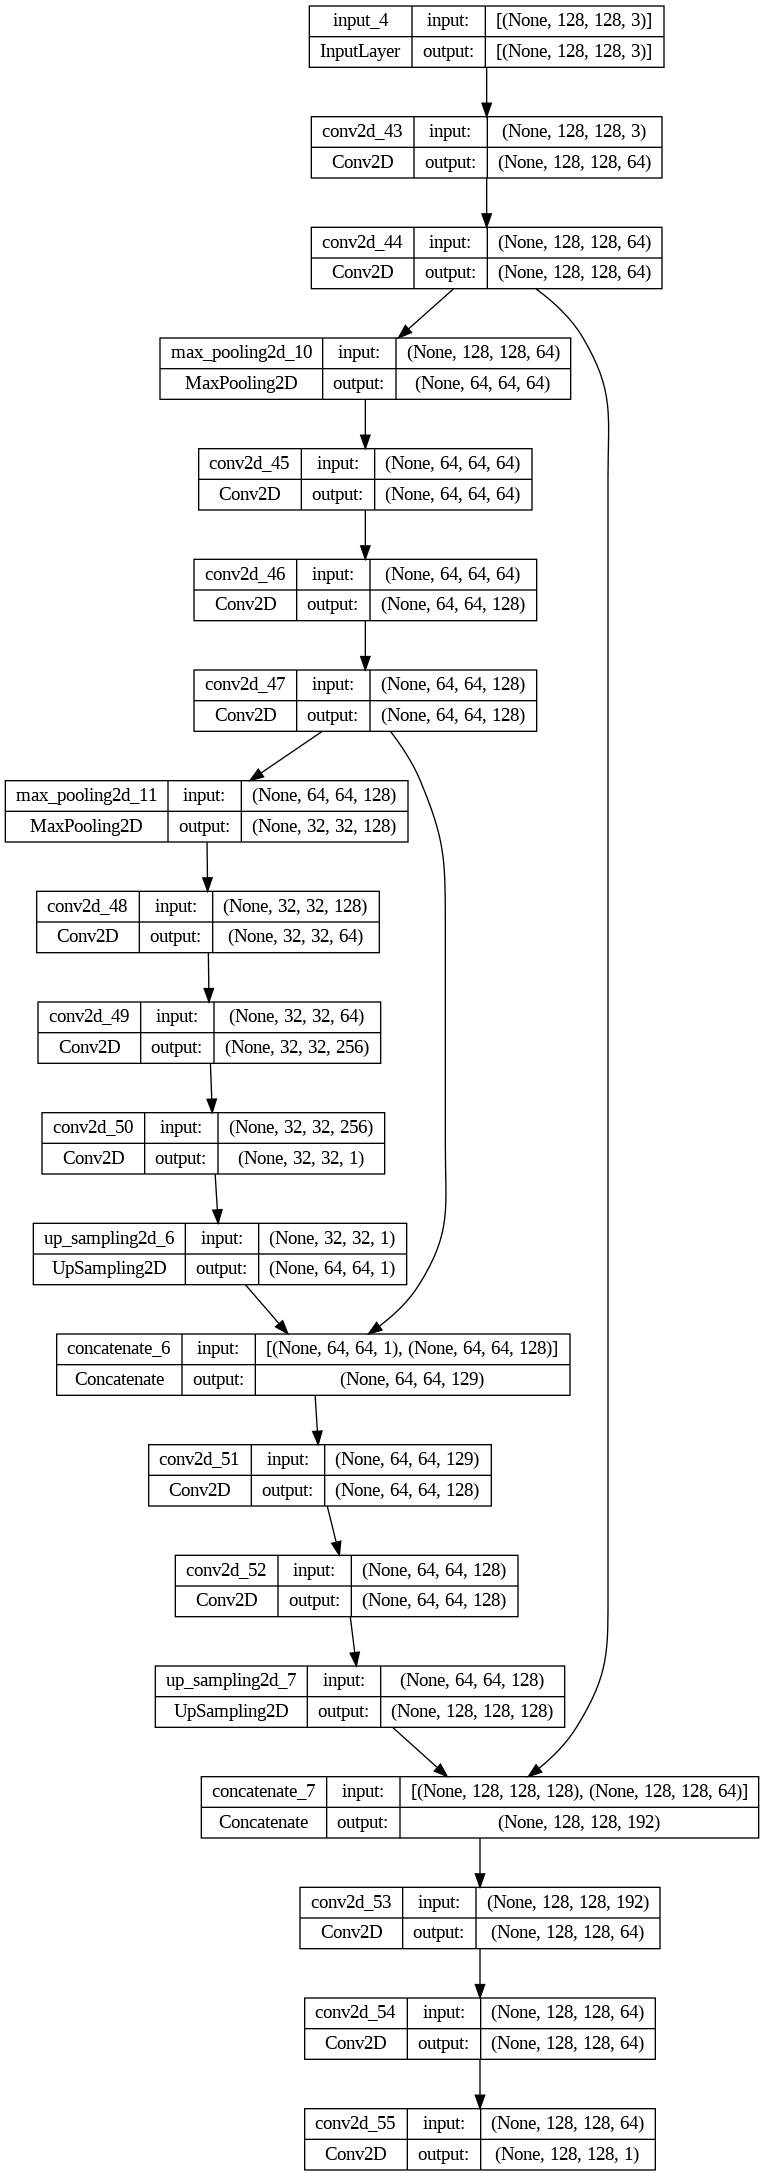

In [ ]:
import tensorflow as tf

x = tf.keras.layers.Input((128, 128, 3))

# Encoder
enc1 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
enc2 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(enc1)
enc3 = tf.keras.layers.MaxPooling2D((2, 2))(enc2)
enc3 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(enc3)
enc4 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(enc3)
enc5 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(enc4)
enc6 = tf.keras.layers.MaxPooling2D((2, 2))(enc5)
enc6 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(enc6)
enc7 = tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')(enc6)
enc8 = tf.keras.layers.Conv2D(1, (3, 3), padding='same', activation='relu')(enc7)

# Skip connections
skip1 = enc2
skip2 = enc5

# Decoder
dec1 = tf.keras.layers.UpSampling2D((2, 2))(enc8)
dec1 = tf.keras.layers.Concatenate()([dec1, skip2])
dec1 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(dec1)
dec1 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(dec1)

dec2 = tf.keras.layers.UpSampling2D((2, 2))(dec1)
dec2 = tf.keras.layers.Concatenate()([dec2, skip1])
dec2 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(dec2)
dec2 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(dec2)

# dec3 = tf.keras.layers.UpSampling2D((2, 2))(dec2)
dec3 = tf.keras.layers.Conv2D(1, (3, 3), padding='same', activation='sigmoid')(dec2)

model_Unet = tf.keras.Model(inputs=x, outputs=dec3)

tf.keras.utils.plot_model(model_Unet, show_shapes=True)


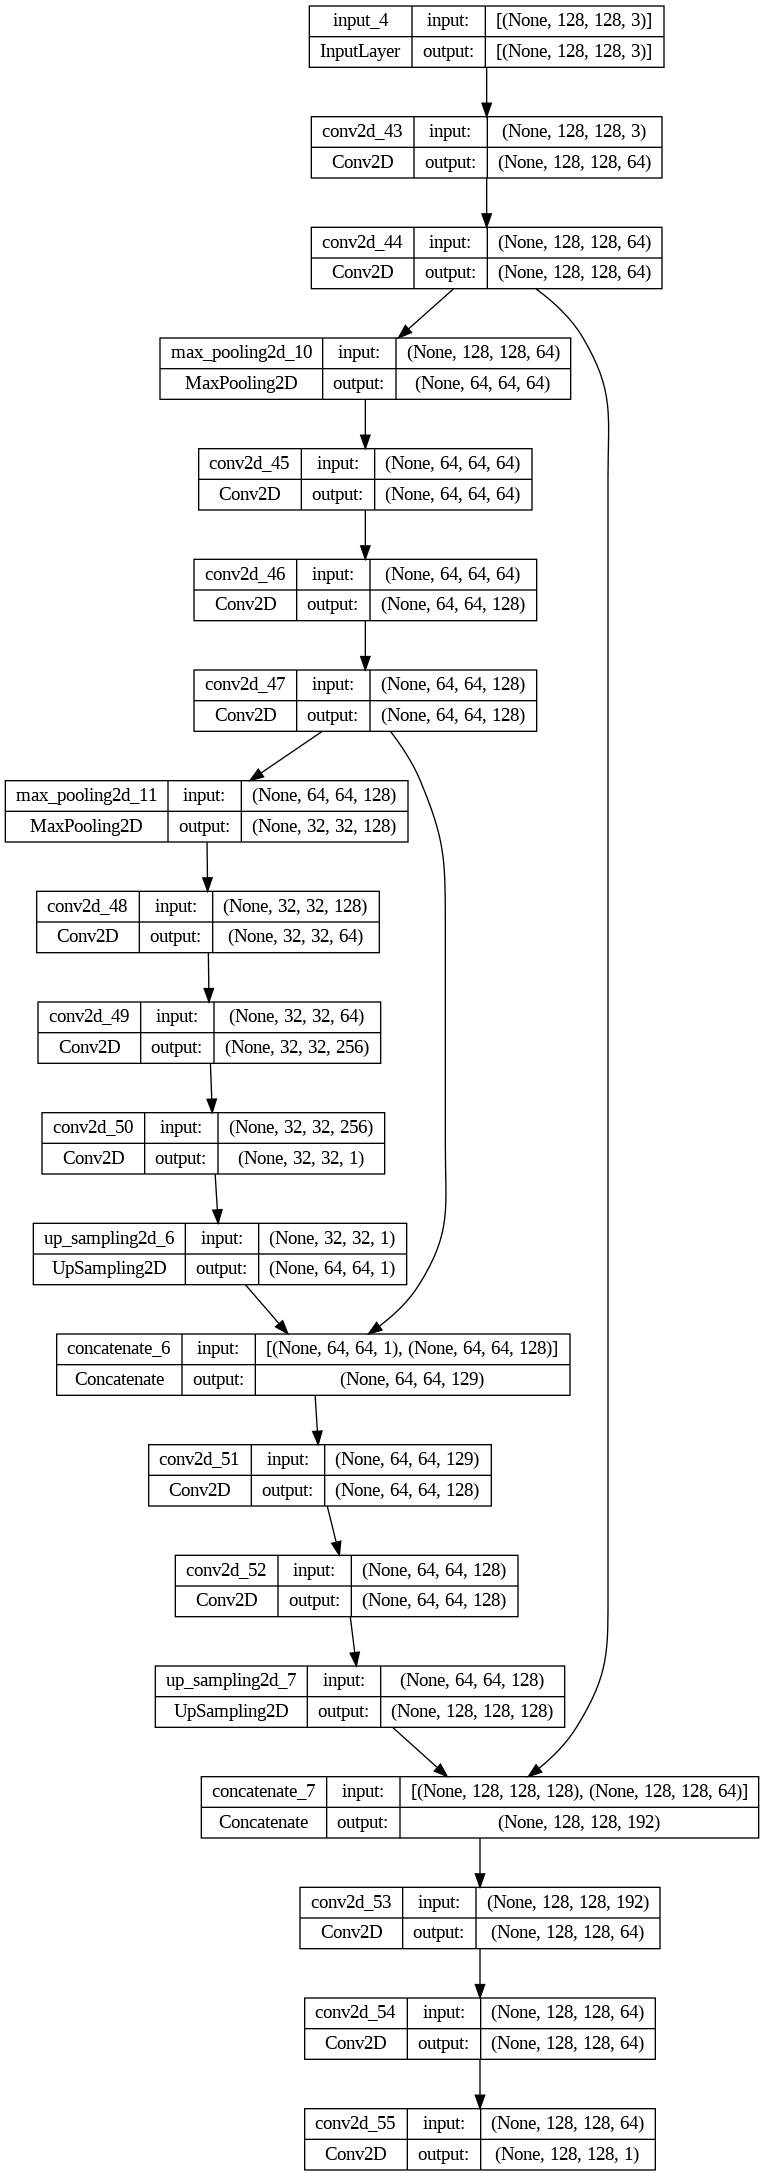

In [ ]:
model_final = tf.keras.Model(inputs=x, outputs=dec3)

tf.keras.utils.plot_model(model_final, show_shapes=True)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy, MeanIoU
from tensorflow.keras.optimizers import Nadam,Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

# Define the callbacks
early_stopping_cb = EarlyStopping(patience=5, restore_best_weights=True)
model_checkpoint_cb = ModelCheckpoint("/kaggle/working/watermodel.h5", save_best_only=True)

# Define the loss function
loss = tf.keras.losses.BinaryCrossentropy()



# Define the evaluation metrics
metrics = [
    BinaryAccuracy(name='accuracy'),
    Precision(name='precision'),
    Recall(name='recall')
]

# Define the optimizer with a specified learning rate
optimizer = Nadam(learning_rate=0.0001)




# Compile the model with the specified optimizer, loss function, and metrics
model_final.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Train the model with the specified batch size, number of epochs, and validation data
history = model_final.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))



Epoch 1/50
71/71 [==============================] - 27s 308ms/step - loss: 0.2680 - accuracy: 0.8157 - precision: 0.9057 - recall: 0.6892 - val_loss: 0.2678 - val_accuracy: 0.8199 - val_precision: 0.9024 - val_recall: 0.6705
Epoch 2/50
71/71 [==============================] - 21s 292ms/step - loss: 0.2617 - accuracy: 0.8191 - precision: 0.9119 - recall: 0.6932 - val_loss: 0.2716 - val_accuracy: 0.8185 - val_precision: 0.8865 - val_recall: 0.6876
Epoch 3/50
71/71 [==============================] - 19s 264ms/step - loss: 0.2639 - accuracy: 0.8171 - precision: 0.9074 - recall: 0.6922 - val_loss: 0.2769 - val_accuracy: 0.8194 - val_precision: 0.9015 - val_recall: 0.6706
Epoch 4/50
71/71 [==============================] - 19s 266ms/step - loss: 0.2618 - accuracy: 0.8198 - precision: 0.9139 - recall: 0.6938 - val_loss: 0.2691 - val_accuracy: 0.8203 - val_precision: 0.9097 - val_recall: 0.6609
Epoch 5/50
71/71 [==============================] - 20s 288ms/step - loss: 0.2648 - accuracy: 0.8175

# Accuracy check

# loss check

# Model evaluation

1/1 [==============================] - 0s 18ms/step


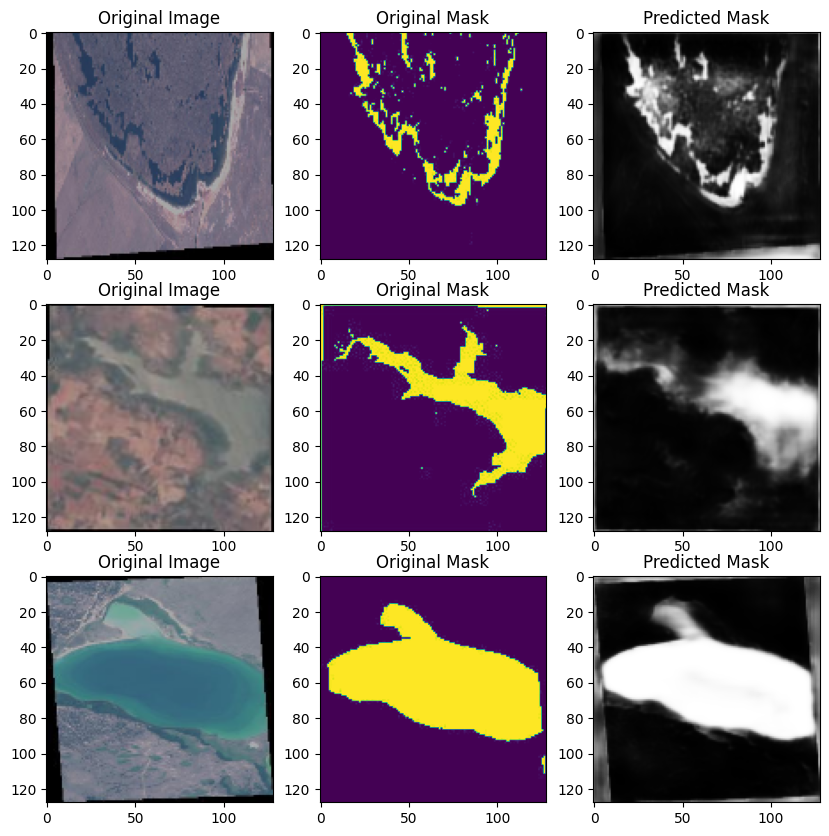

In [ ]:
figure, axes = plt.subplots(3,3, figsize=(10,10))

for i in range(0,3):
    rand_num = random.randint(0,100)
    original_img = X_test[rand_num]
    axes[i,0].imshow(original_img)
    axes[i,0].title.set_text('Original Image')

    original_mask = y_test[rand_num]
    axes[i,1].imshow(original_mask)
    axes[i,1].title.set_text('Original Mask')

    original_img = np.expand_dims(original_img, axis=0)
    predicted_mask = model_final.predict(original_img).reshape(128,128)
    axes[i,2].imshow(predicted_mask, cmap='gray')
    axes[i,2].title.set_text('Predicted Mask')

1/1 [==============================] - 0s 17ms/step


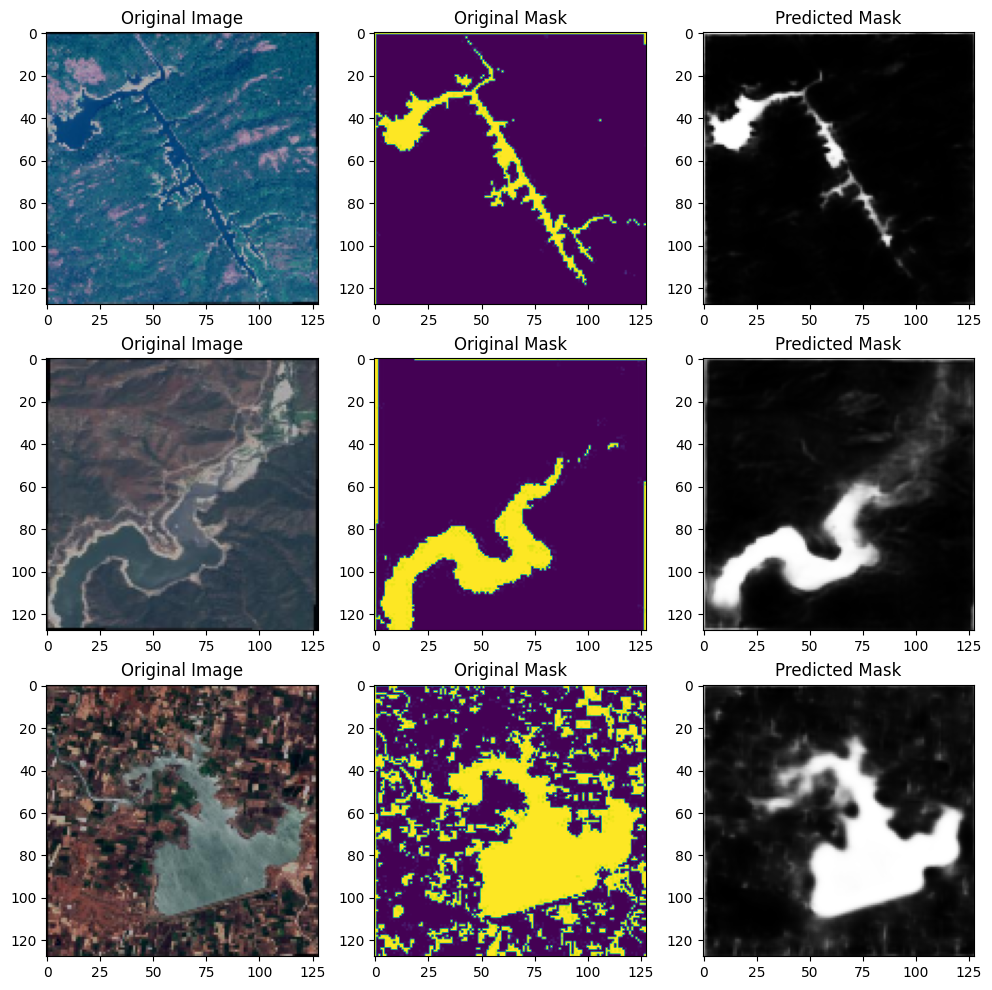

In [ ]:
figure, axes = plt.subplots(3,3, figsize=(12,12))

for i in range(0,3):
    rand_num = random.randint(0,100)
    original_img = X_test[rand_num]
    axes[i,0].imshow(original_img)
    axes[i,0].title.set_text('Original Image')

    original_mask = y_test[rand_num]
    axes[i,1].imshow(original_mask)
    axes[i,1].title.set_text('Original Mask')

    original_img = np.expand_dims(original_img, axis=0)
    predicted_mask = model_final.predict(original_img).reshape(128,128)
    axes[i,2].imshow(predicted_mask, cmap='gray')
    axes[i,2].title.set_text('Predicted Mask')